In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt ###Importing necessary libraries
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [2]:
df=pd.read_csv(r'G:\Python_dataframes\Transorg\MMM\Sample_Media_Spend_Data.csv')####Importing data

In [3]:
df.head()

Division Calendar_Week  Paid_Views  Organic_Views  Google_Impressions  \
0        A    01-06-2018         392            422                 408   
1        A     1/13/2018         787            904                 110   
2        A     1/20/2018          81            970                 742   
3        A     1/27/2018          25            575                  65   
4        A    02-03-2018         565            284                 295   

   Email_Impressions  Facebook_Impressions  Affiliate_Impressions  \
0        349895.0107                 73580                  12072   
1        506270.2176                 11804                   9499   
2        430042.1538                 52232                  17048   
3        417745.6658                 78640                  10207   
4        408505.8012                 40561                   5834   

   Overall_Views  Sales       Price  
0            682  59417  112.201334  
1            853  56806  117.358495  
2            759  48715  136.850388  
3            942  72047   92.532190  
4            658  56235  118.550132

In [4]:
df.describe()

Paid_Views  Organic_Views  Google_Impressions  Email_Impressions  \
count    3051.000000    3051.000000        3.051000e+03       3.051000e+03   
mean    15093.941658   13355.673222        8.861738e+05       7.605094e+05   
std     30785.884979   24079.399689        1.355076e+06       6.260141e+05   
min         1.000000       1.000000        7.000000e+00       4.089445e+04   
25%       537.000000     712.500000        1.698280e+05       3.784969e+05   
50%      2699.000000    4110.000000        4.905310e+05       5.909708e+05   
75%     17358.000000   16230.500000        1.022622e+06       9.622466e+05   
max    518190.000000  270453.000000        1.715044e+07       7.317730e+06   

       Facebook_Impressions  Affiliate_Impressions  Overall_Views  \
count          3.051000e+03            3051.000000    3051.000000   
mean           2.691269e+05           22910.902655   27980.914127   
std            4.665117e+05           21617.637497   52054.976687   
min            2.900000e+01             910.000000       2.000000   
25%            5.707350e+04            9127.000000     747.000000   
50%            1.275230e+05           16658.000000    7879.000000   
75%            2.835050e+05           27486.500000   34111.500000   
max            7.558435e+06          175791.000000  635057.000000   

              Sales        Price  
count  3.051000e+03  3051.000000  
mean   1.859014e+05    67.820702  
std    2.322079e+05    48.988182  
min    1.543600e+04     1.864578  
25%    7.339350e+04    32.844699  
50%    1.135730e+05    58.699397  
75%    2.029755e+05    90.834565  
max    3.575430e+06   431.890818

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Division               3051 non-null   object 
 1   Calendar_Week          3051 non-null   object 
 2   Paid_Views             3051 non-null   int64  
 3   Organic_Views          3051 non-null   int64  
 4   Google_Impressions     3051 non-null   int64  
 5   Email_Impressions      3051 non-null   float64
 6   Facebook_Impressions   3051 non-null   int64  
 7   Affiliate_Impressions  3051 non-null   int64  
 8   Overall_Views          3051 non-null   int64  
 9   Sales                  3051 non-null   int64  
 10  Price                  3051 non-null   float64
dtypes: float64(2), int64(7), object(2)
memory usage: 262.3+ KB


In [6]:
df.head()

Division Calendar_Week  Paid_Views  Organic_Views  Google_Impressions  \
0        A    01-06-2018         392            422                 408   
1        A     1/13/2018         787            904                 110   
2        A     1/20/2018          81            970                 742   
3        A     1/27/2018          25            575                  65   
4        A    02-03-2018         565            284                 295   

   Email_Impressions  Facebook_Impressions  Affiliate_Impressions  \
0        349895.0107                 73580                  12072   
1        506270.2176                 11804                   9499   
2        430042.1538                 52232                  17048   
3        417745.6658                 78640                  10207   
4        408505.8012                 40561                   5834   

   Overall_Views  Sales       Price  
0            682  59417  112.201334  
1            853  56806  117.358495  
2            759  48715  136.850388  
3            942  72047   92.532190  
4            658  56235  118.550132

In [7]:
df['Calendar_Week_Date'] = pd.to_datetime(df['Calendar_Week'])

In [8]:
df.head()

Division Calendar_Week  Paid_Views  Organic_Views  Google_Impressions  \
0        A    01-06-2018         392            422                 408   
1        A     1/13/2018         787            904                 110   
2        A     1/20/2018          81            970                 742   
3        A     1/27/2018          25            575                  65   
4        A    02-03-2018         565            284                 295   

   Email_Impressions  Facebook_Impressions  Affiliate_Impressions  \
0        349895.0107                 73580                  12072   
1        506270.2176                 11804                   9499   
2        430042.1538                 52232                  17048   
3        417745.6658                 78640                  10207   
4        408505.8012                 40561                   5834   

   Overall_Views  Sales       Price Calendar_Week_Date  
0            682  59417  112.201334         2018-01-06  
1            853  56806  117.358495         2018-01-13  
2            759  48715  136.850388         2018-01-20  
3            942  72047   92.532190         2018-01-27  
4            658  56235  118.550132         2018-02-03

In [9]:
df.drop('Calendar_Week',axis=1,inplace=True)

In [10]:
df.head()

Division  Paid_Views  Organic_Views  Google_Impressions  Email_Impressions  \
0        A         392            422                 408        349895.0107   
1        A         787            904                 110        506270.2176   
2        A          81            970                 742        430042.1538   
3        A          25            575                  65        417745.6658   
4        A         565            284                 295        408505.8012   

   Facebook_Impressions  Affiliate_Impressions  Overall_Views  Sales  \
0                 73580                  12072            682  59417   
1                 11804                   9499            853  56806   
2                 52232                  17048            759  48715   
3                 78640                  10207            942  72047   
4                 40561                   5834            658  56235   

        Price Calendar_Week_Date  
0  112.201334         2018-01-06  
1  117.358495         2018-01-13  
2  136.850388         2018-01-20  
3   92.532190         2018-01-27  
4  118.550132         2018-02-03

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Division               3051 non-null   object        
 1   Paid_Views             3051 non-null   int64         
 2   Organic_Views          3051 non-null   int64         
 3   Google_Impressions     3051 non-null   int64         
 4   Email_Impressions      3051 non-null   float64       
 5   Facebook_Impressions   3051 non-null   int64         
 6   Affiliate_Impressions  3051 non-null   int64         
 7   Overall_Views          3051 non-null   int64         
 8   Sales                  3051 non-null   int64         
 9   Price                  3051 non-null   float64       
 10  Calendar_Week_Date     3051 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(7), object(1)
memory usage: 262.3+ KB


In [12]:
df.shape

(3051, 11)

In [13]:
df['Division'].nunique()

26

In [14]:
cityName={'A':'Mumbai','B':'Banglore','C':'Hyderabad','D':'Pune','E':'Gurugram','F':'Jaipur','G':'Indore','H':'Ahmedabad','I':'Surat',
     'J':'Kolkata','K':'Kanpur','L':'Chennai','M':'Nagpur','N':'Bhopal','O':'Lucknow','P':'Visakhapatnam','Q':'Jodhpur','R':'Kochi',
     'S':'Coimbatore','T':'Delhi','U':'Agra','V':'Gandhinagar','W':'Patna','X':'Panji','Y':'Vadodara', 'Z':'Nashik'}


In [15]:
df['Division']=df['Division'].map(cityName)

In [16]:
df.head()

Division  Paid_Views  Organic_Views  Google_Impressions  Email_Impressions  \
0   Mumbai         392            422                 408        349895.0107   
1   Mumbai         787            904                 110        506270.2176   
2   Mumbai          81            970                 742        430042.1538   
3   Mumbai          25            575                  65        417745.6658   
4   Mumbai         565            284                 295        408505.8012   

   Facebook_Impressions  Affiliate_Impressions  Overall_Views  Sales  \
0                 73580                  12072            682  59417   
1                 11804                   9499            853  56806   
2                 52232                  17048            759  48715   
3                 78640                  10207            942  72047   
4                 40561                   5834            658  56235   

        Price Calendar_Week_Date  
0  112.201334         2018-01-06  
1  117.358495         2018-01-13  
2  136.850388         2018-01-20  
3   92.532190         2018-01-27  
4  118.550132         2018-02-03

In [17]:
df.isnull().sum()

Division                 0
Paid_Views               0
Organic_Views            0
Google_Impressions       0
Email_Impressions        0
Facebook_Impressions     0
Affiliate_Impressions    0
Overall_Views            0
Sales                    0
Price                    0
Calendar_Week_Date       0
dtype: int64

In [18]:
#df.to_csv('Sample_Media_Spend.csv' , index = False)###Export to csv

## Checking for distribution of data

C:\Users\Pratik Shroff\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pratik Shroff\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pratik Shroff\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

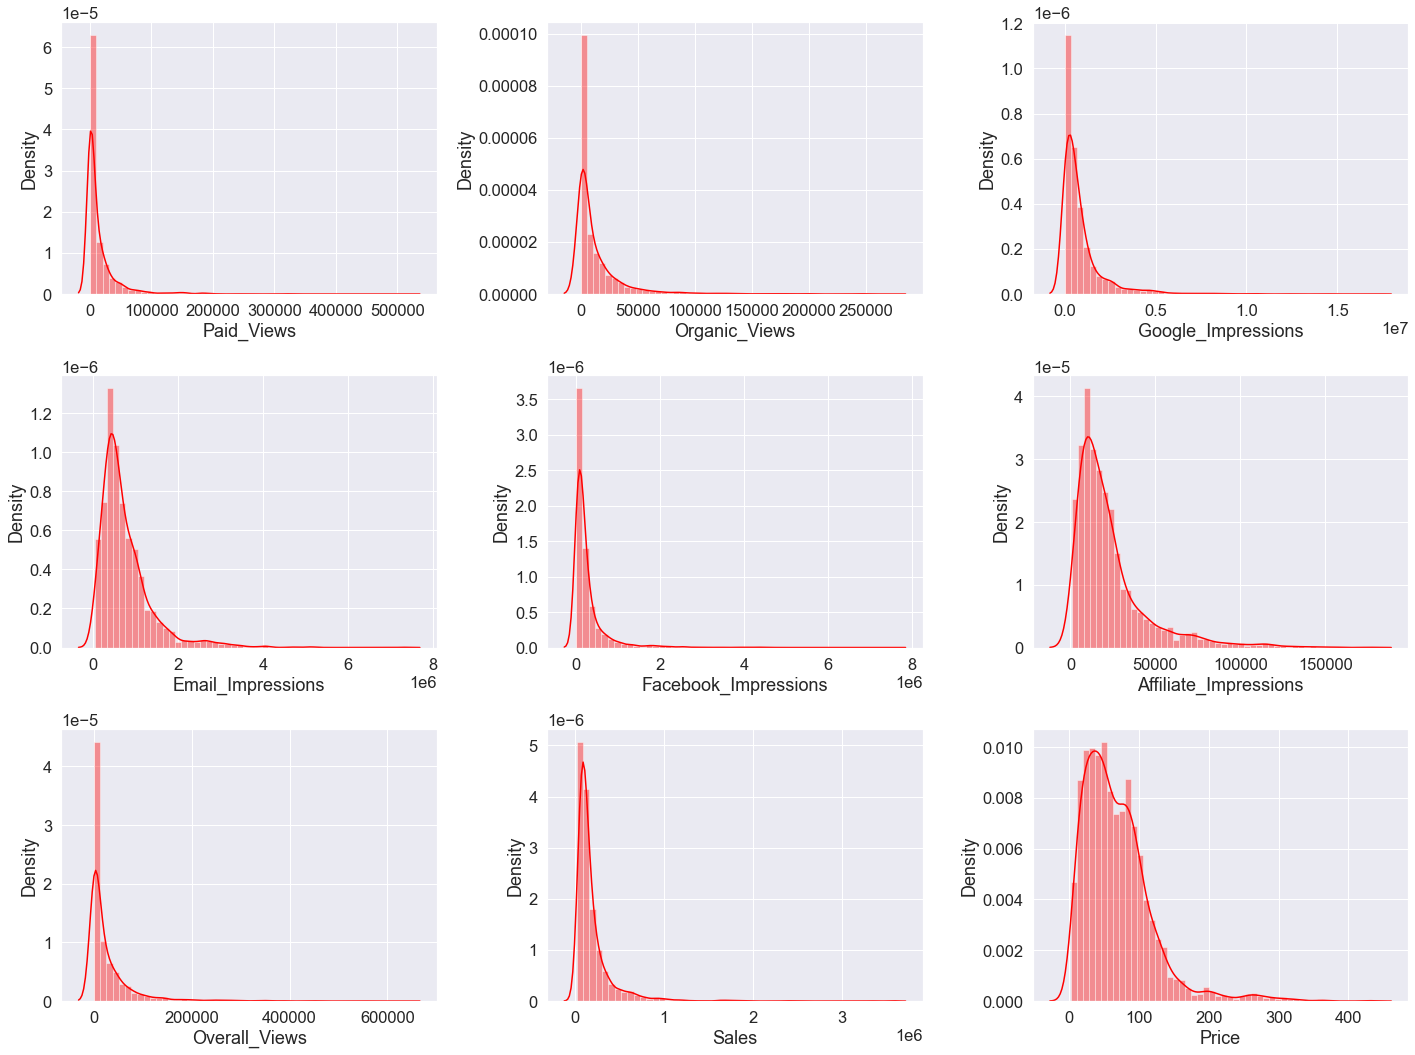

In [19]:
plt.figure(figsize = (20,15))
for i in range(1,10):
    plt.subplot(3,3,i)
    sns.distplot(df[df.columns[i]],color='red')
    plt.tight_layout()

## Checking for Outliers

C:\Users\Pratik Shroff\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pratik Shroff\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pratik Shroff\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

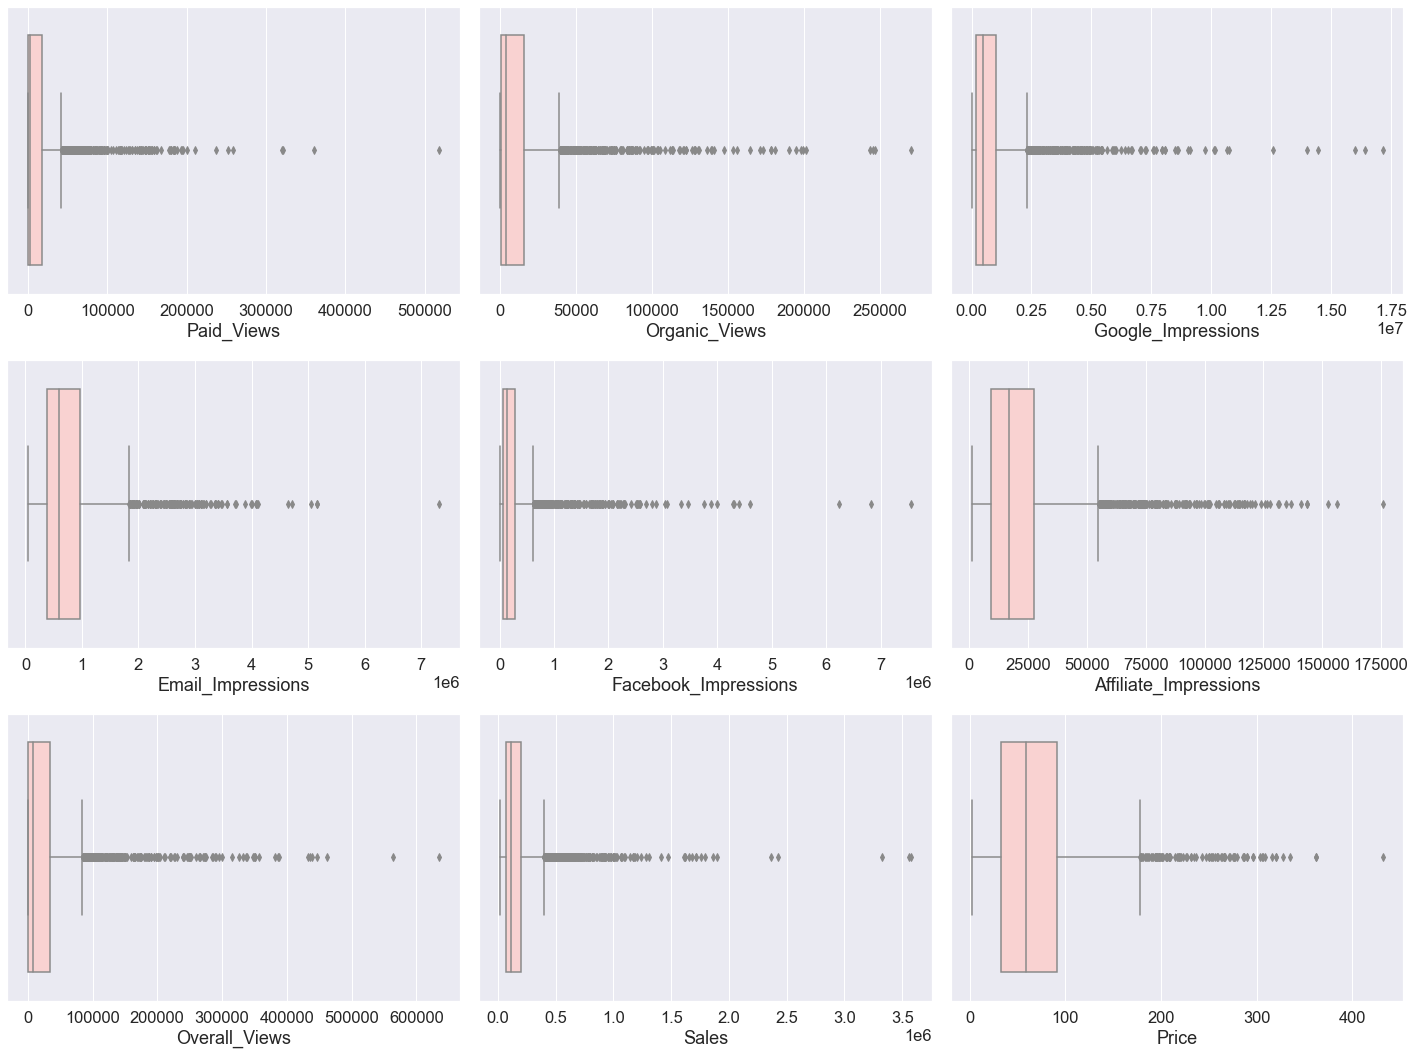

In [20]:
plt.figure(figsize = (20,15))
for i in range(1,10):
    plt.subplot(3,3,i)
    sns.boxplot(df[df.columns[i]],color='#FFCCCB')
    plt.tight_layout()

## Data is not normally distributed. We will perform the log transformation to normally distribute the data

In [21]:
def log_transform(d):
    for col in df.columns:
        if (((d[col].dtype)=='float64') | ((d[col].dtype)=='int64')):
            d[col]=np.log(df[col])
        else:
            d[col]=d[col]
    return d

df_ln=log_transform(df)

In [22]:
df_ln.head()

Division  Paid_Views  Organic_Views  Google_Impressions  Email_Impressions  \
0   Mumbai    5.971262       6.045005            6.011267          12.765388   
1   Mumbai    6.668228       6.806829            4.700480          13.134826   
2   Mumbai    4.394449       6.877296            6.609349          12.971639   
3   Mumbai    3.218876       6.354370            4.174387          12.942628   
4   Mumbai    6.336826       5.648974            5.686975          12.920261   

   Facebook_Impressions  Affiliate_Impressions  Overall_Views      Sales  \
0             11.206129               9.398644       6.525030  10.992336   
1              9.376194               9.158942       6.748760  10.947397   
2             10.863451               9.743788       6.632002  10.793742   
3             11.272636               9.230829       6.848005  11.185074   
4             10.610562               8.671458       6.489205  10.937295   

      Price Calendar_Week_Date  
0  4.720295         2018-01-06  
1  4.765233         2018-01-13  
2  4.918888         2018-01-20  
3  4.527557         2018-01-27  
4  4.775336         2018-02-03

C:\Users\Pratik Shroff\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pratik Shroff\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pratik Shroff\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

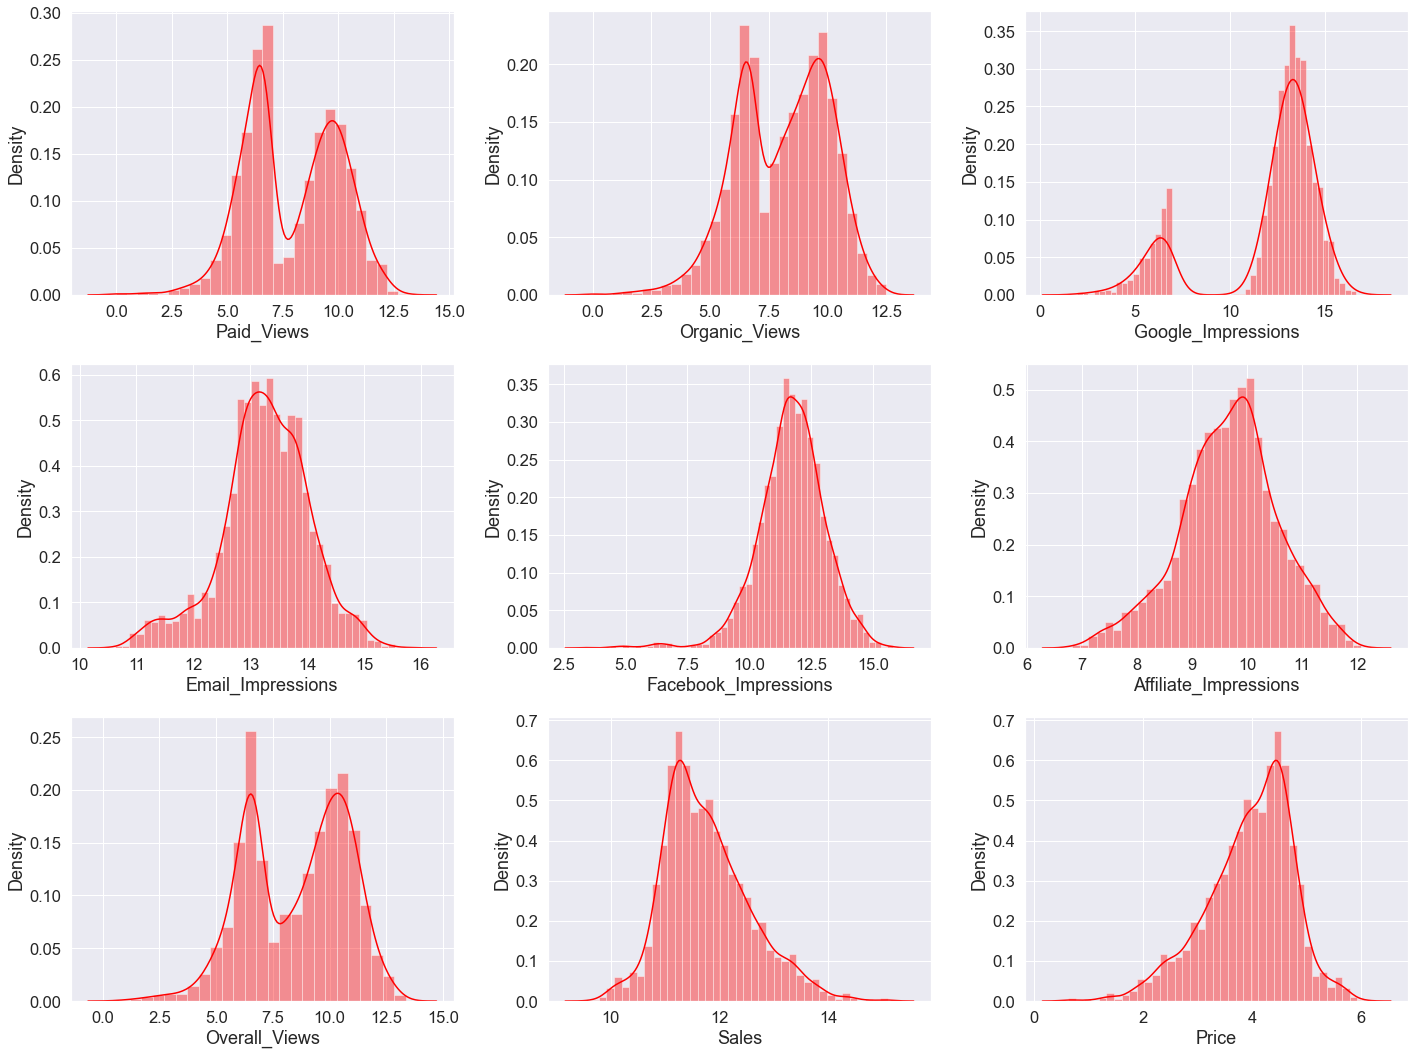

In [23]:
plt.figure(figsize = (20,15))
for i in range(1,10):
    plt.subplot(3,3,i)
    sns.distplot(df_ln[df_ln.columns[i]],color='red')
    plt.tight_layout()

C:\Users\Pratik Shroff\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pratik Shroff\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pratik Shroff\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

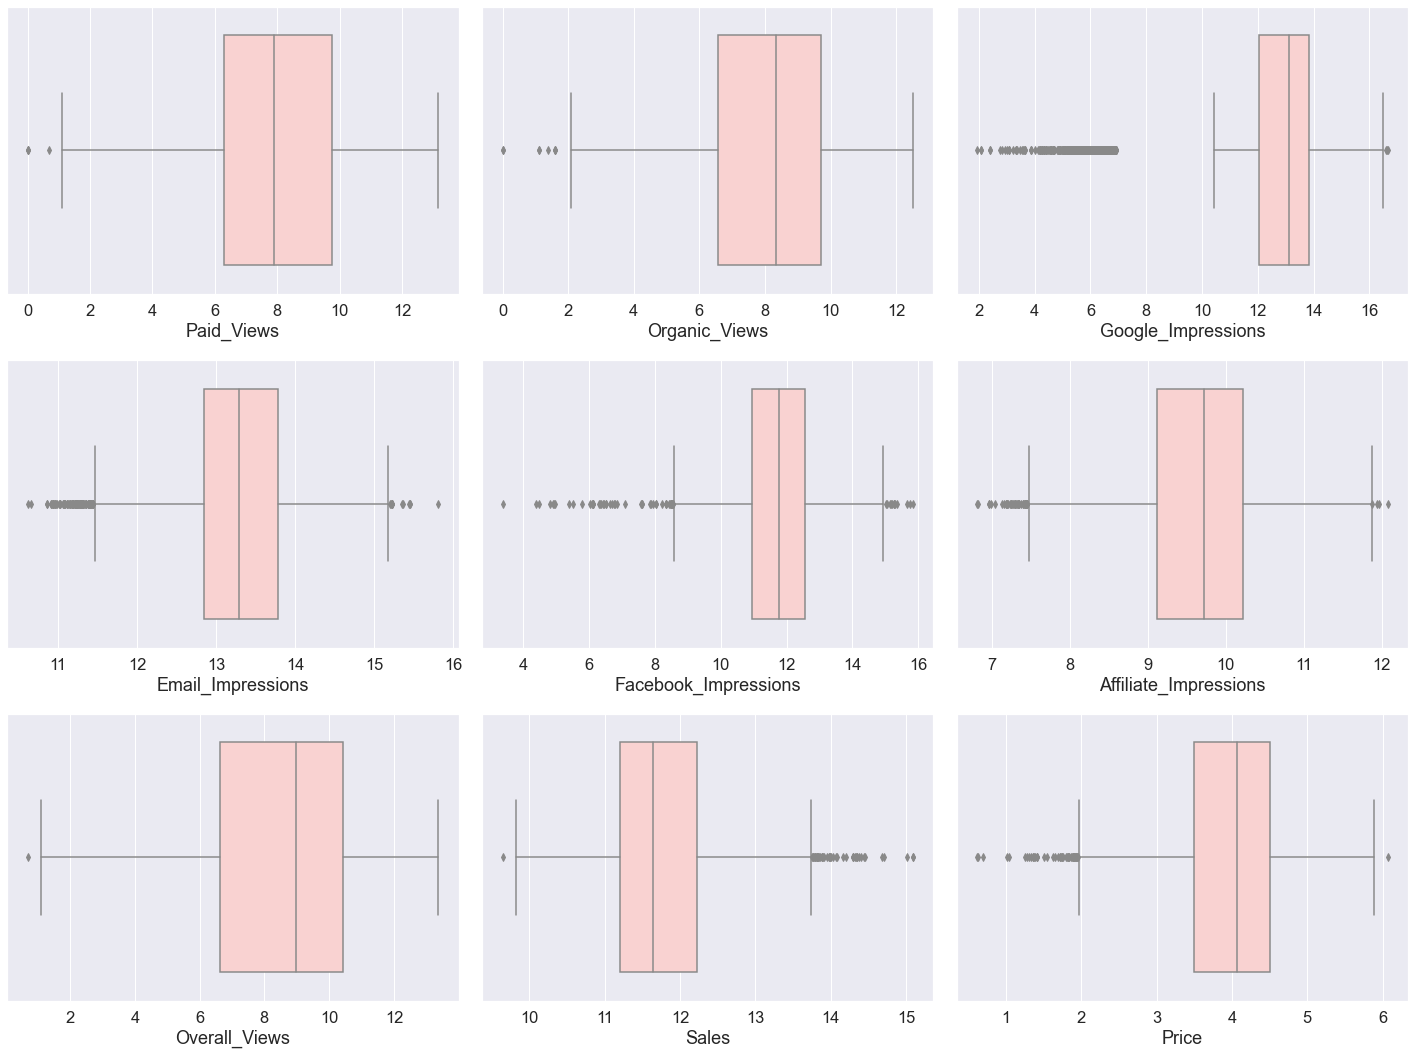

In [24]:
plt.figure(figsize = (20,15))
for i in range(1,10):
    plt.subplot(3,3,i)
    sns.boxplot(df_ln[df_ln.columns[i]],color='#FFCCCB')
    plt.tight_layout()

## From the Tableau report we can see that less values of Google impressions, Facebook and email impressions shows higher sales. So we will not remove the outliers as they can serve as important informatio to predict the sales. We will perform the further analysis without removing outliers and check the results. 
## Also the data points are 3051. So, removing outliers may take away the important information from the data.

In [25]:
df.columns

Index(['Division', 'Paid_Views', 'Organic_Views', 'Google_Impressions',
       'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions',
       'Overall_Views', 'Sales', 'Price', 'Calendar_Week_Date'],
      dtype='object')

In [26]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            Q1,Q3=np.percentile(df[col],(25,75))
            IQR=Q3-Q1
            Lower_bound=Q1-1.5*IQR
            Upper_bound=Q3+1.5*IQR
            df[col][df[col] <= Lower_bound] = Lower_bound
            df[col][df[col] >= Upper_bound] = Upper_bound
        else:
            df[col]=df[col]
    return df

final_df=cap_data(df_ln)

capping the  Division
capping the  Paid_Views
capping the  Organic_Views
capping the  Google_Impressions
capping the  Email_Impressions
capping the  Facebook_Impressions
capping the  Affiliate_Impressions
capping the  Overall_Views
capping the  Sales
capping the  Price
capping the  Calendar_Week_Date


<ipython-input-26-105c3030907b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= Lower_bound] = Lower_bound
<ipython-input-26-105c3030907b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= Upper_bound] = Upper_bound
<ipython-input-26-105c3030907b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= Lower_bound] = Lower_bound
<ipython-input-26-105c3030907b>:10: SettingWithCopyWarnin

C:\Users\Pratik Shroff\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pratik Shroff\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pratik Shroff\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

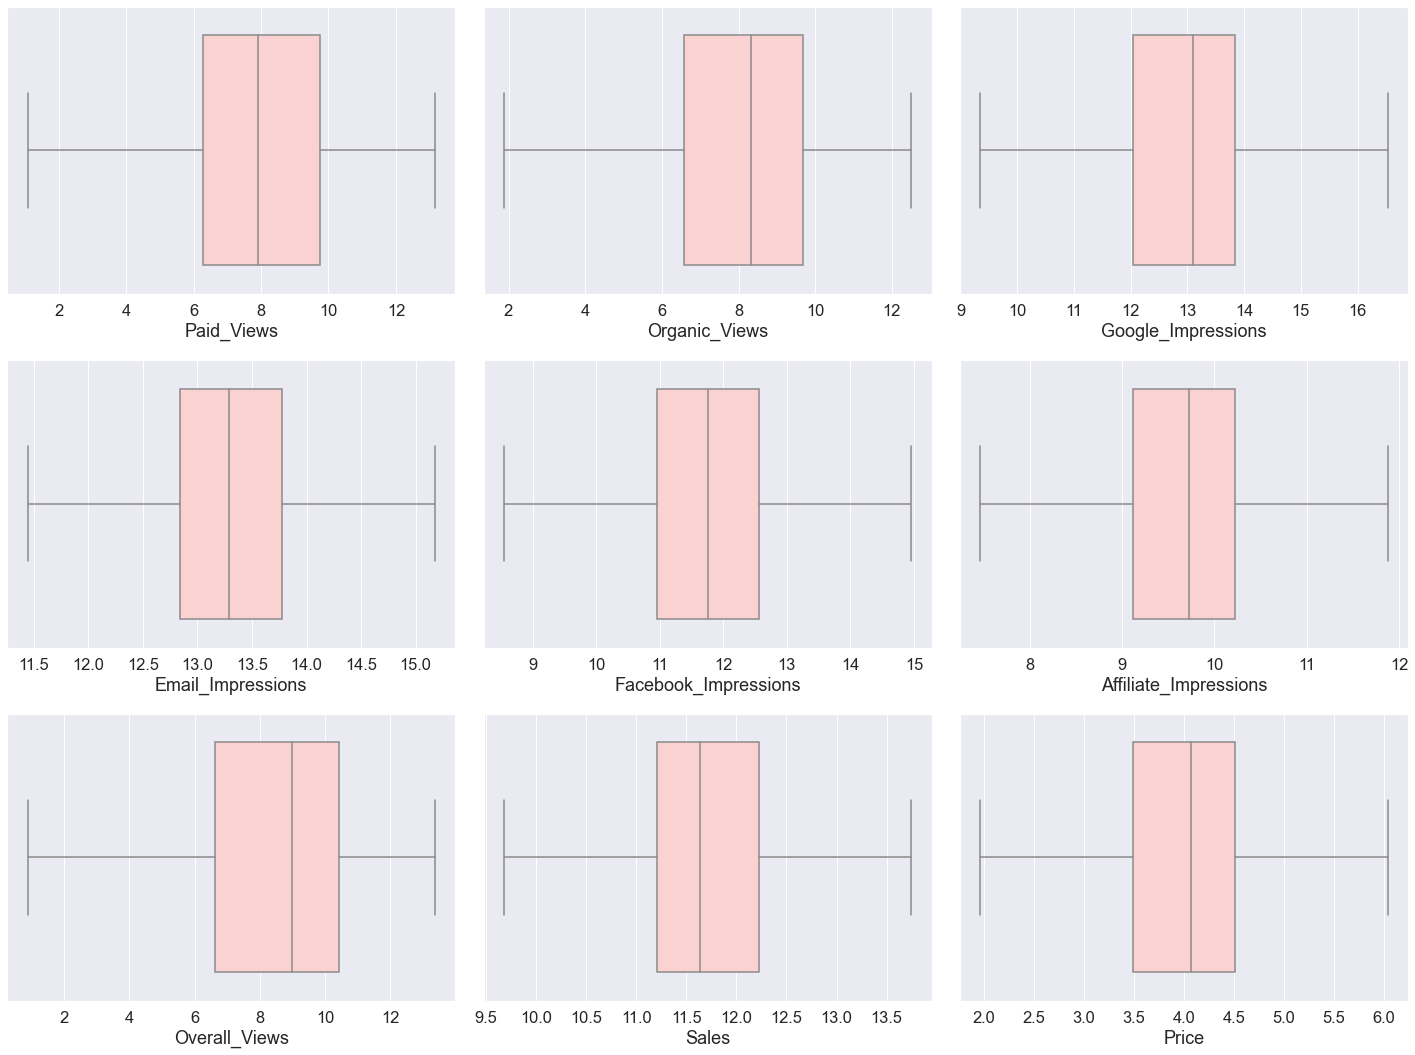

In [27]:
plt.figure(figsize = (20,15))
for i in range(1,10):
    plt.subplot(3,3,i)
    sns.boxplot(final_df[final_df.columns[i]],color='#FFCCCB')
    plt.tight_layout()

### Checking linearity of the data

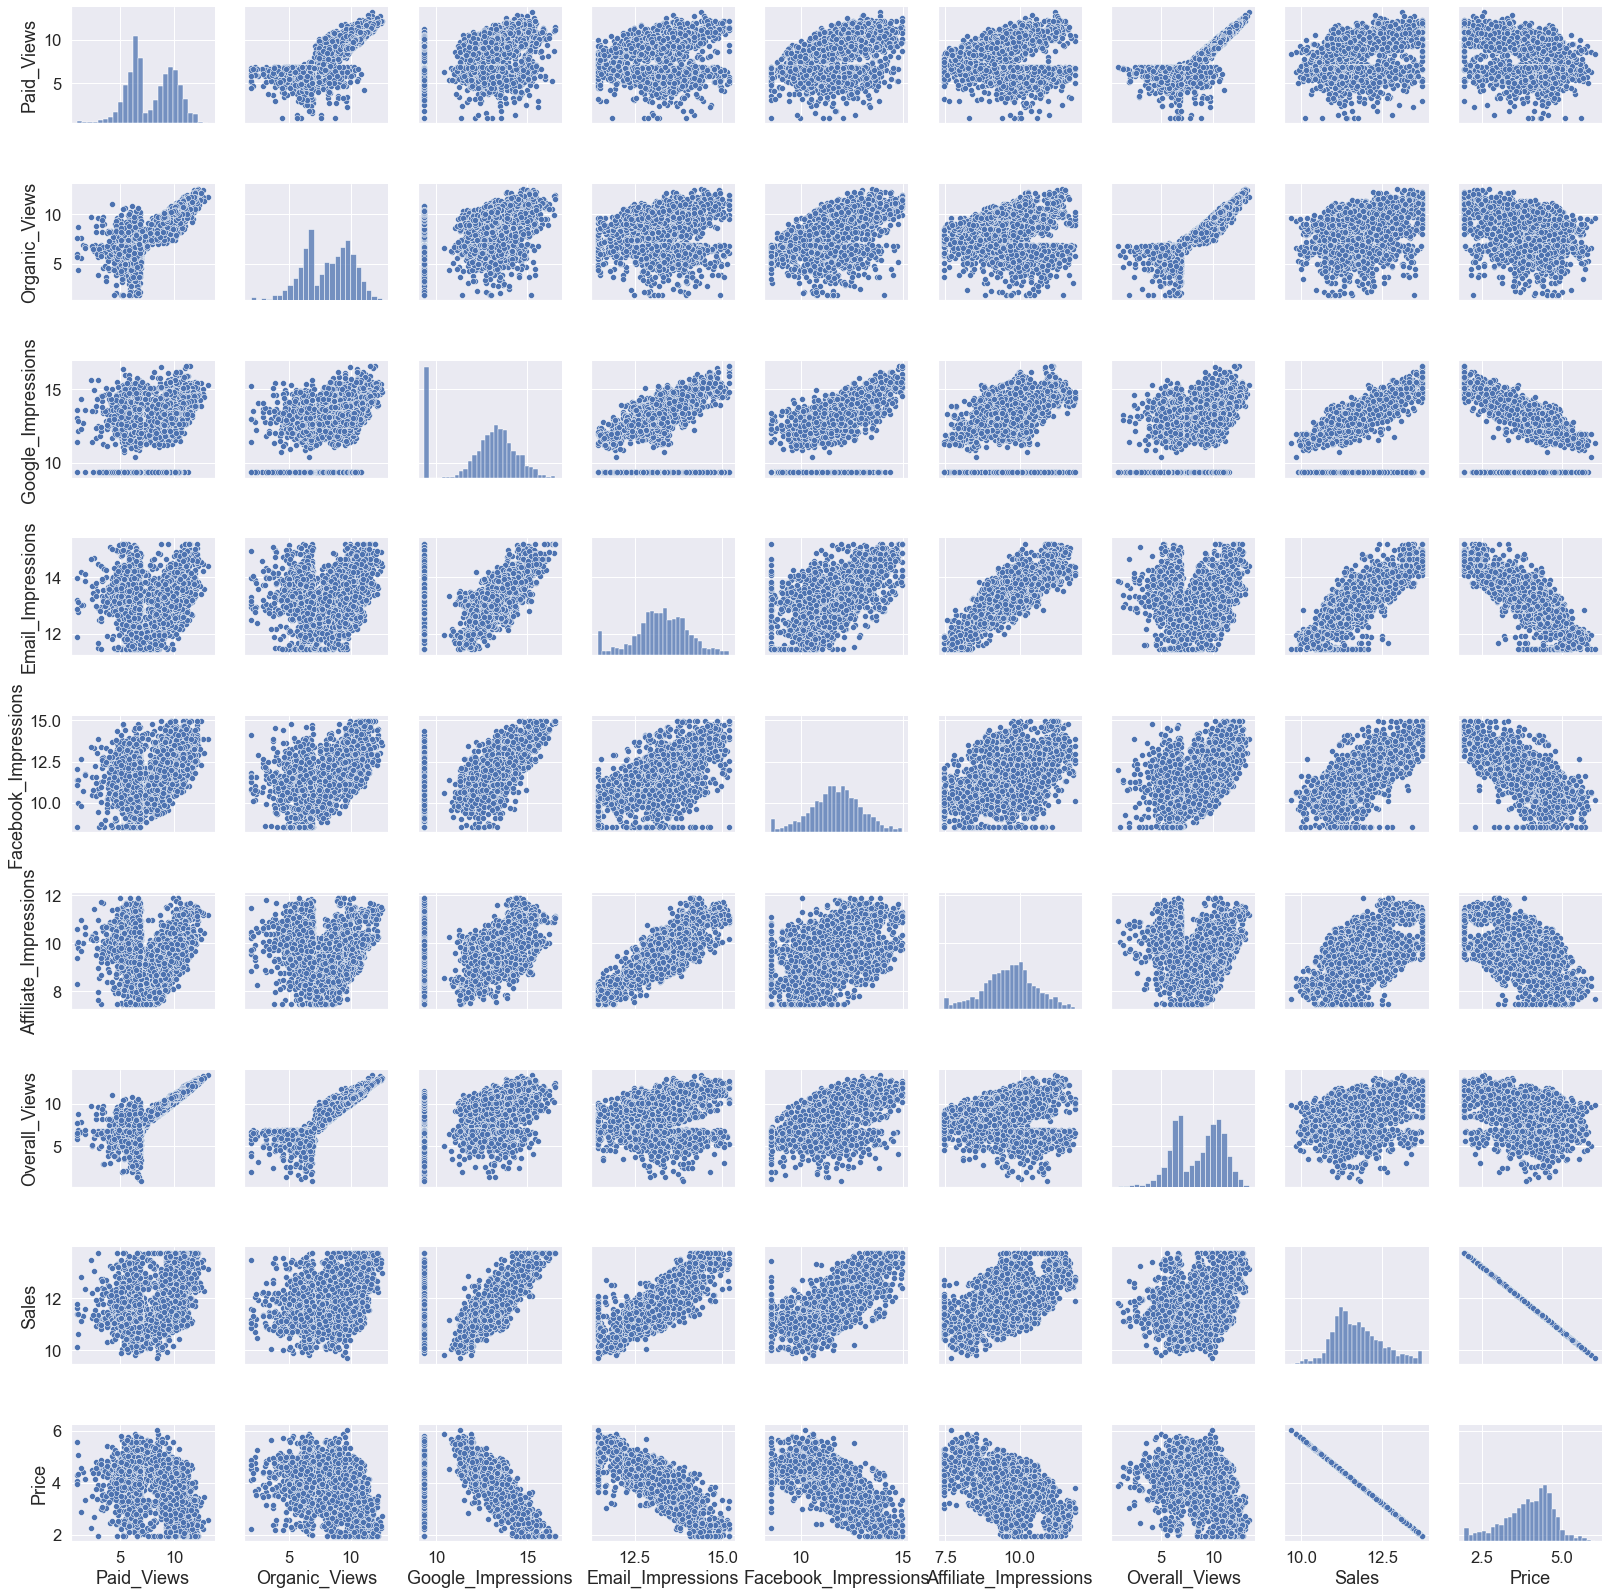

In [28]:
sns.pairplot(df_ln)
plt.tight_layout()

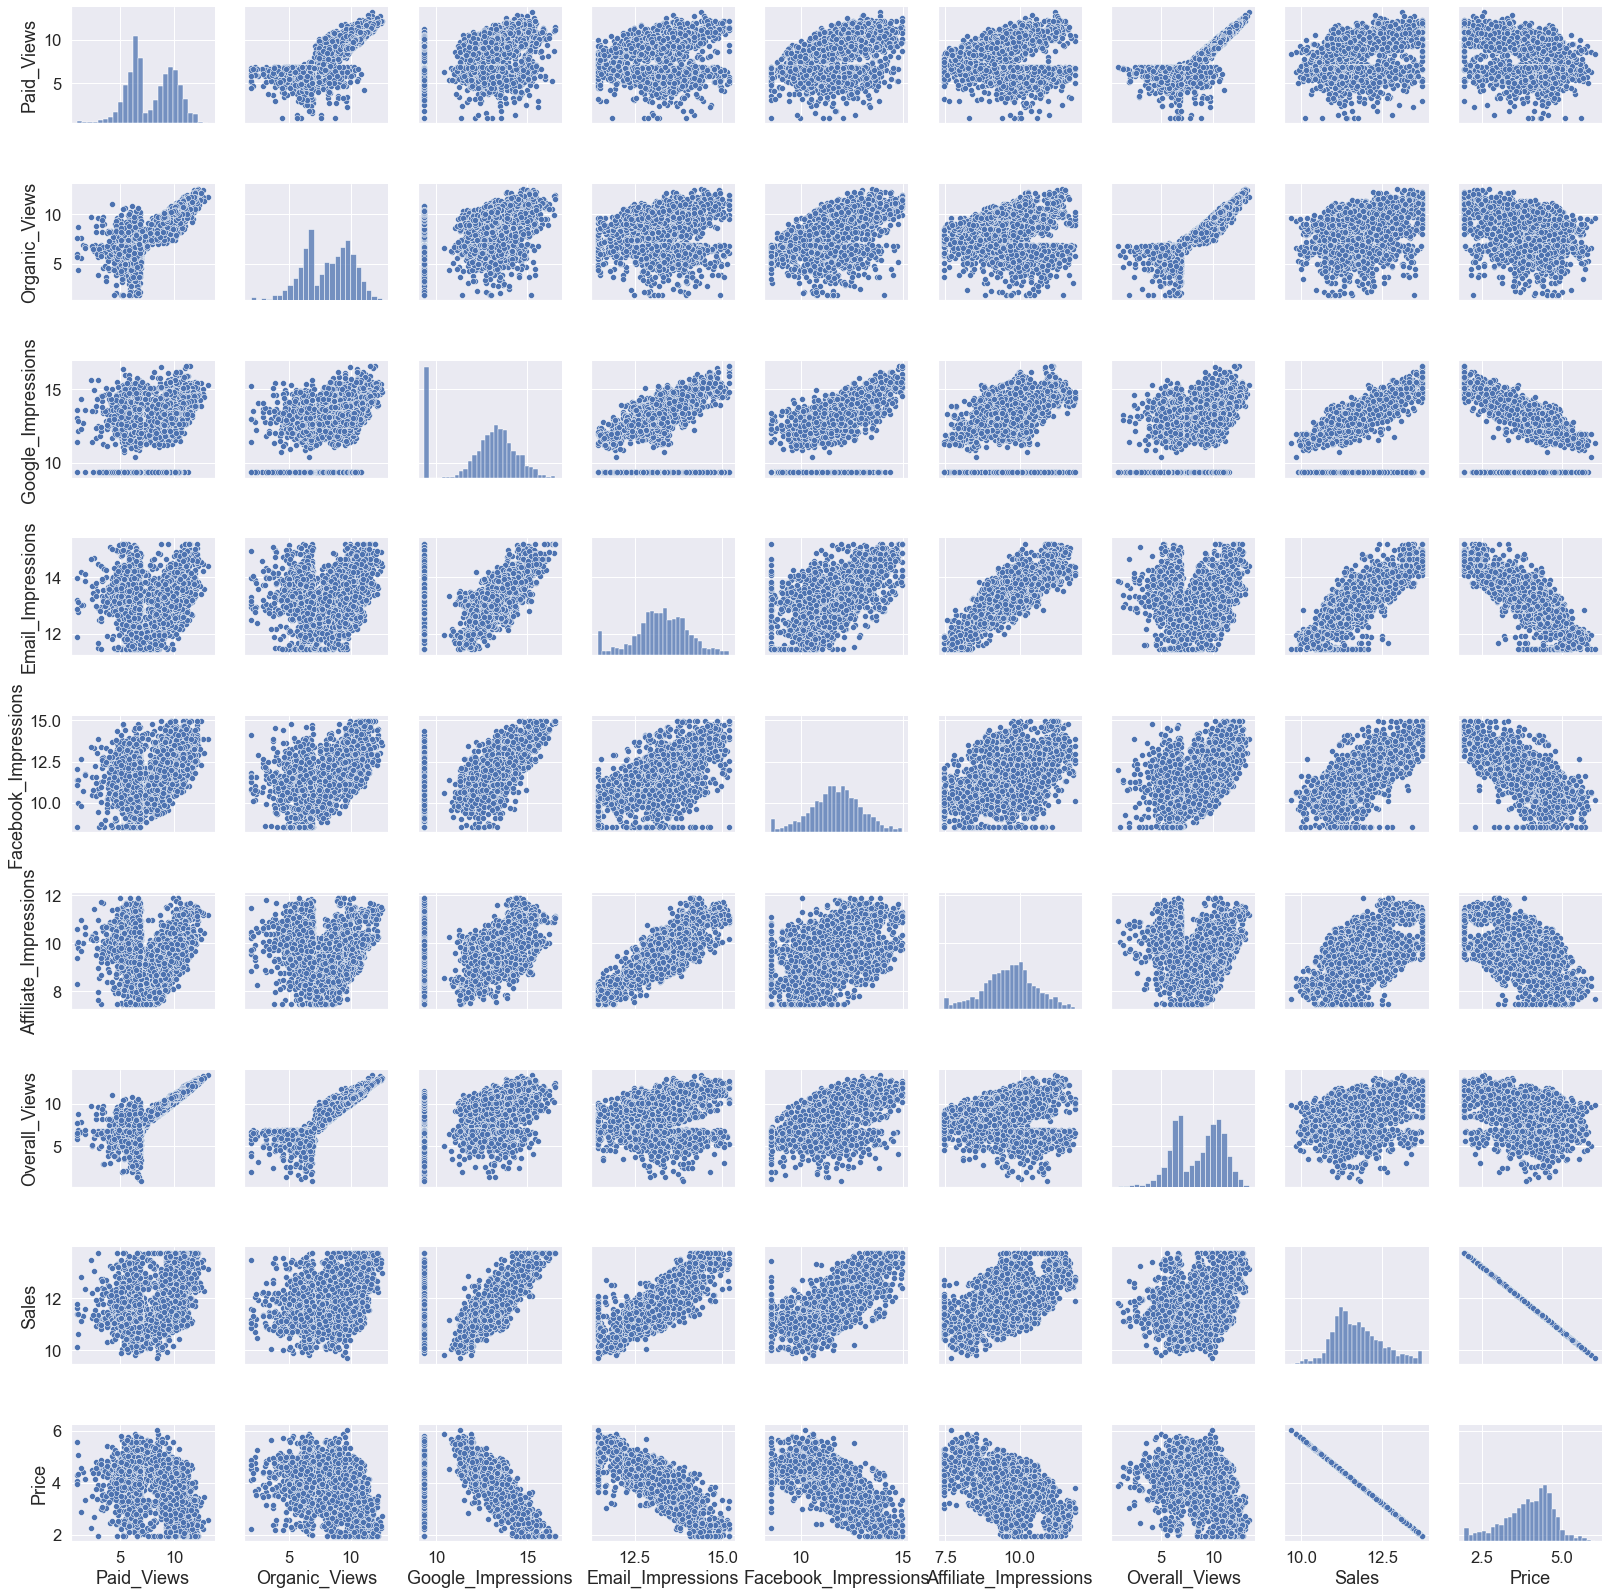

In [29]:
sns.pairplot(final_df)
plt.tight_layout()

## Overall Views, Paid Views and Organic Views has no such relation with Sales. 
## While the Google impressions, email impressions and Facebook impressions has some relationship with Sales. 

<AxesSubplot:>

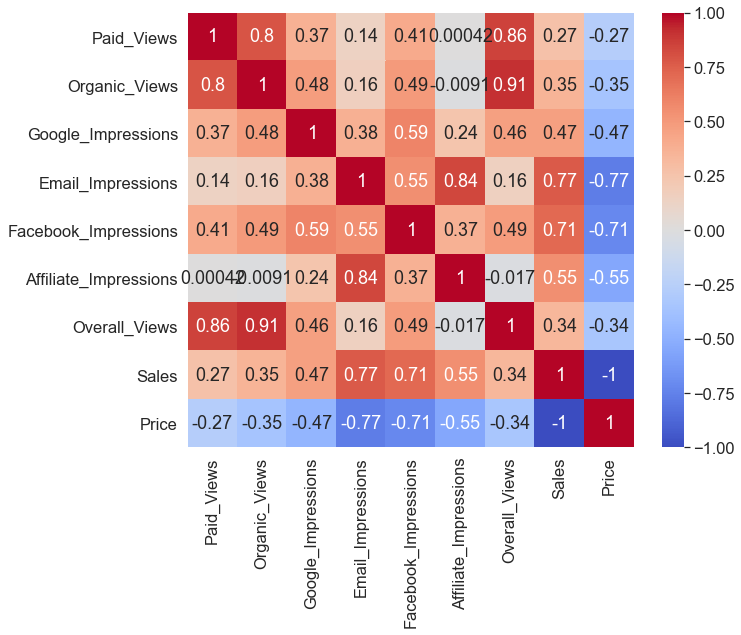

In [30]:
corr=df_ln.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<AxesSubplot:>

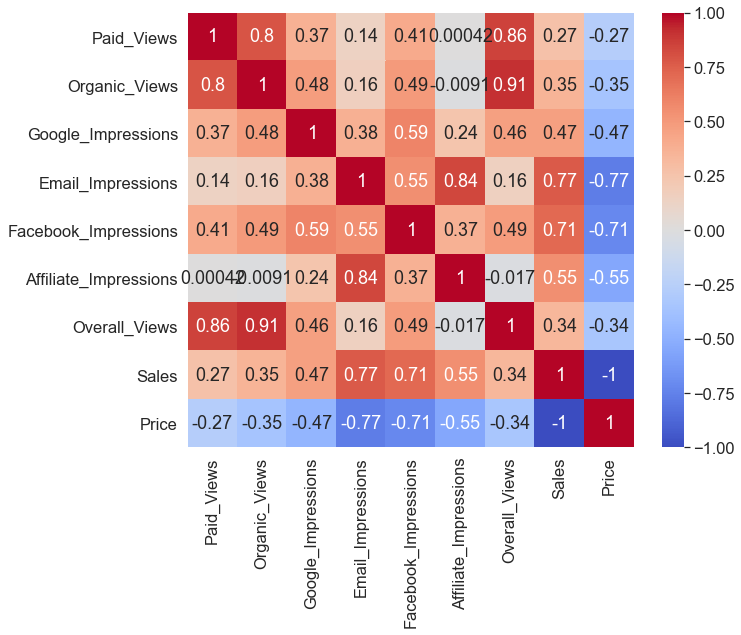

In [31]:
corr=final_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [32]:
X_new=df_ln.drop(['Sales','Division','Calendar_Week_Date','Price'],axis=1)

In [33]:
X_new_1=final_df.drop(['Sales','Division','Calendar_Week_Date','Price'],axis=1)

In [34]:
X_new.head()

Paid_Views  Organic_Views  Google_Impressions  Email_Impressions  \
0    5.971262       6.045005            9.349534          12.765388   
1    6.668228       6.806829            9.349534          13.134826   
2    4.394449       6.877296            9.349534          12.971639   
3    3.218876       6.354370            9.349534          12.942628   
4    6.336826       5.648974            9.349534          12.920261   

   Facebook_Impressions  Affiliate_Impressions  Overall_Views  
0             11.206129               9.398644       6.525030  
1              9.376194               9.158942       6.748760  
2             10.863451               9.743788       6.632002  
3             11.272636               9.230829       6.848005  
4             10.610562               8.671458       6.489205

In [35]:
X_new_1.head()

Paid_Views  Organic_Views  Google_Impressions  Email_Impressions  \
0    5.971262       6.045005            9.349534          12.765388   
1    6.668228       6.806829            9.349534          13.134826   
2    4.394449       6.877296            9.349534          12.971639   
3    3.218876       6.354370            9.349534          12.942628   
4    6.336826       5.648974            9.349534          12.920261   

   Facebook_Impressions  Affiliate_Impressions  Overall_Views  
0             11.206129               9.398644       6.525030  
1              9.376194               9.158942       6.748760  
2             10.863451               9.743788       6.632002  
3             11.272636               9.230829       6.848005  
4             10.610562               8.671458       6.489205

In [36]:
y_f=df_ln['Sales']
y_f.head()

0    10.992336
1    10.947397
2    10.793742
3    11.185074
4    10.937295
Name: Sales, dtype: float64

In [37]:
y_f_1=final_df['Sales']
y_f_1.head()

0    10.992336
1    10.947397
2    10.793742
3    11.185074
4    10.937295
Name: Sales, dtype: float64

In [75]:
## Feature selection using Random Forest classifier
# Building the model
rf = RandomForestRegressor(n_estimators=100, max_depth=3,
                            bootstrap=True, n_jobs=-1,
                            random_state=0)
# Training the model
rf.fit(X_new_1, y_f_1)

RandomForestRegressor(max_depth=3, n_jobs=-1, random_state=0)

Text(0.5, 1.0, 'Visualizing Feature Importances')

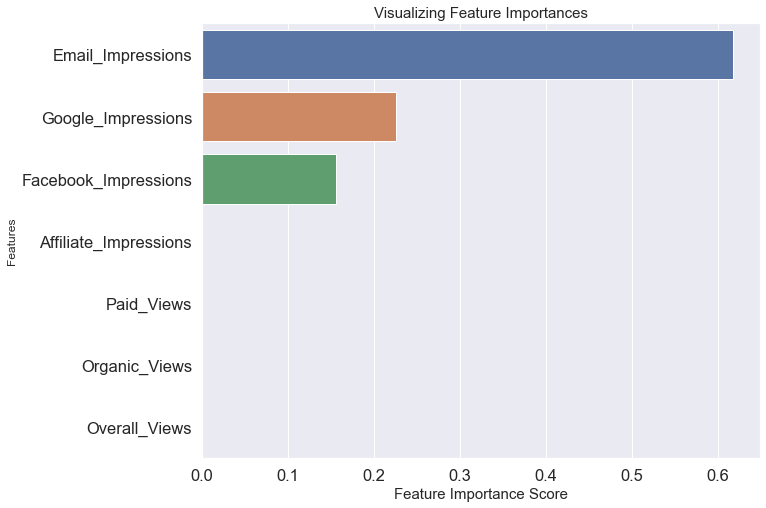

In [76]:
# making the feature importances plot
feature_imp = pd.Series(rf.feature_importances_, 
                        index=X_new.columns).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score', fontsize=15)
plt.ylabel('Features', fontsize=12)
plt.title("Visualizing Feature Importances", fontsize=15)

## Perform Feature Scaling (Standard Scaler)

In [40]:
## with outliers
X_f_stand_scaled=X_new.copy()

X_f_stand_scaled.columns

for X_f in X_f_stand_scaled.columns:
    X_f_stand_scaled[X_f] = StandardScaler().fit_transform(X_f_stand_scaled[X_f].values.reshape(len(X_f_stand_scaled), 1))

X_f_stand_scaled

Paid_Views  Organic_Views  Google_Impressions  Email_Impressions  \
0      -0.925695      -1.055576           -1.851439          -0.662549   
1      -0.595345      -0.664263           -1.851439          -0.174862   
2      -1.673076      -0.628068           -1.851439          -0.390282   
3      -2.230277      -0.896670           -1.851439          -0.428578   
4      -0.752424      -1.258998           -1.851439          -0.458104   
...          ...            ...                 ...                ...   
3046    1.118115       1.047311            0.380051           1.222423   
3047    1.066641       1.099741            0.381847          -0.103849   
3048    1.039094       1.156088            0.185363          -0.412958   
3049    0.954714       1.140670            0.216077           0.068109   
3050    0.832048       1.080359            0.197533          -0.363018   

      Facebook_Impressions  Affiliate_Impressions  Overall_Views  
0                -0.421881              -0.313025      -0.909829  
1                -1.877894              -0.585813      -0.809466  
2                -0.694538               0.079759      -0.861842  
3                -0.368964              -0.504004      -0.764945  
4                -0.895752              -1.140583      -0.925900  
...                    ...                    ...            ...  
3046             -0.812658              -0.310577       1.048513  
3047              0.474740              -0.579958       1.048496  
3048              0.912588              -0.543250       1.064071  
3049              0.972880              -0.502444       1.009719  
3050              0.203315              -0.494345       0.949043  

[3051 rows x 7 columns]

In [41]:
## without outliers
X_f_1_stand_scaled=X_new_1.copy()

X_f_1_stand_scaled.columns

for X_f_1 in X_f_1_stand_scaled.columns:
    X_f_1_stand_scaled[X_f_1] = StandardScaler().fit_transform(X_f_1_stand_scaled[X_f_1].values.reshape(len(X_f_1_stand_scaled), 1))

X_f_1_stand_scaled

Paid_Views  Organic_Views  Google_Impressions  Email_Impressions  \
0      -0.925695      -1.055576           -1.851439          -0.662549   
1      -0.595345      -0.664263           -1.851439          -0.174862   
2      -1.673076      -0.628068           -1.851439          -0.390282   
3      -2.230277      -0.896670           -1.851439          -0.428578   
4      -0.752424      -1.258998           -1.851439          -0.458104   
...          ...            ...                 ...                ...   
3046    1.118115       1.047311            0.380051           1.222423   
3047    1.066641       1.099741            0.381847          -0.103849   
3048    1.039094       1.156088            0.185363          -0.412958   
3049    0.954714       1.140670            0.216077           0.068109   
3050    0.832048       1.080359            0.197533          -0.363018   

      Facebook_Impressions  Affiliate_Impressions  Overall_Views  
0                -0.421881              -0.313025      -0.909829  
1                -1.877894              -0.585813      -0.809466  
2                -0.694538               0.079759      -0.861842  
3                -0.368964              -0.504004      -0.764945  
4                -0.895752              -1.140583      -0.925900  
...                    ...                    ...            ...  
3046             -0.812658              -0.310577       1.048513  
3047              0.474740              -0.579958       1.048496  
3048              0.912588              -0.543250       1.064071  
3049              0.972880              -0.502444       1.009719  
3050              0.203315              -0.494345       0.949043  

[3051 rows x 7 columns]

## Robust Scaler

In [42]:
X_f_robust_scaled=X_new.copy()

X_f_robust_scaled.columns

for X_f in X_f_robust_scaled.columns:
    X_f_robust_scaled[X_f] = RobustScaler().fit_transform(X_f_robust_scaled[X_f].values.reshape(len(X_f_robust_scaled), 1))

X_f_robust_scaled

Paid_Views  Organic_Views  Google_Impressions  Email_Impressions  \
0      -0.555085      -0.728173           -2.090809          -0.561734   
1      -0.354566      -0.484457           -2.090809          -0.165794   
2      -1.008737      -0.461914           -2.090809          -0.340688   
3      -1.346952      -0.629204           -2.090809          -0.371780   
4      -0.449912      -0.854868           -2.090809          -0.395751   
...          ...            ...                 ...                ...   
3046    0.685485       0.581540            0.132624           0.968626   
3047    0.654241       0.614194            0.134413          -0.108140   
3048    0.637520       0.649288           -0.061362          -0.359098   
3049    0.586302       0.639685           -0.030758           0.031468   
3050    0.511846       0.602122           -0.049235          -0.318553   

      Facebook_Impressions  Affiliate_Impressions  Overall_Views  
0                -0.343083              -0.292076      -0.640335  
1                -1.484730              -0.509501      -0.581787  
2                -0.556870               0.020992      -0.612341  
3                -0.301590              -0.444295      -0.555815  
4                -0.714640              -0.951680      -0.649710  
...                    ...                    ...            ...  
3046             -0.649487              -0.290125       0.502076  
3047              0.359951              -0.504834       0.502067  
3048              0.703264              -0.475576       0.511153  
3049              0.750538              -0.443052       0.479446  
3050              0.147128              -0.436596       0.444050  

[3051 rows x 7 columns]

In [43]:
data_for_model=pd.concat([X_f_stand_scaled,y_f],axis=1) ### Standard Scaled

In [44]:
data_for_model_2=pd.concat([X_f_robust_scaled,y_f],axis=1) ### Robust Scaled

In [45]:
data_for_model_3=pd.concat([X_f_1_stand_scaled,y_f_1],axis=1) ### Standard Scaled without outliers

In [46]:
data_for_model.head()

Paid_Views  Organic_Views  Google_Impressions  Email_Impressions  \
0   -0.925695      -1.055576           -1.851439          -0.662549   
1   -0.595345      -0.664263           -1.851439          -0.174862   
2   -1.673076      -0.628068           -1.851439          -0.390282   
3   -2.230277      -0.896670           -1.851439          -0.428578   
4   -0.752424      -1.258998           -1.851439          -0.458104   

   Facebook_Impressions  Affiliate_Impressions  Overall_Views      Sales  
0             -0.421881              -0.313025      -0.909829  10.992336  
1             -1.877894              -0.585813      -0.809466  10.947397  
2             -0.694538               0.079759      -0.861842  10.793742  
3             -0.368964              -0.504004      -0.764945  11.185074  
4             -0.895752              -1.140583      -0.925900  10.937295

In [47]:
data_for_model_2.head()

Paid_Views  Organic_Views  Google_Impressions  Email_Impressions  \
0   -0.555085      -0.728173           -2.090809          -0.561734   
1   -0.354566      -0.484457           -2.090809          -0.165794   
2   -1.008737      -0.461914           -2.090809          -0.340688   
3   -1.346952      -0.629204           -2.090809          -0.371780   
4   -0.449912      -0.854868           -2.090809          -0.395751   

   Facebook_Impressions  Affiliate_Impressions  Overall_Views      Sales  
0             -0.343083              -0.292076      -0.640335  10.992336  
1             -1.484730              -0.509501      -0.581787  10.947397  
2             -0.556870               0.020992      -0.612341  10.793742  
3             -0.301590              -0.444295      -0.555815  11.185074  
4             -0.714640              -0.951680      -0.649710  10.937295

In [48]:
data_for_model_3.head()

Paid_Views  Organic_Views  Google_Impressions  Email_Impressions  \
0   -0.925695      -1.055576           -1.851439          -0.662549   
1   -0.595345      -0.664263           -1.851439          -0.174862   
2   -1.673076      -0.628068           -1.851439          -0.390282   
3   -2.230277      -0.896670           -1.851439          -0.428578   
4   -0.752424      -1.258998           -1.851439          -0.458104   

   Facebook_Impressions  Affiliate_Impressions  Overall_Views      Sales  
0             -0.421881              -0.313025      -0.909829  10.992336  
1             -1.877894              -0.585813      -0.809466  10.947397  
2             -0.694538               0.079759      -0.861842  10.793742  
3             -0.368964              -0.504004      -0.764945  11.185074  
4             -0.895752              -1.140583      -0.925900  10.937295

## Fit the Regression model using Statsmodel library

In [49]:
## Data with Standard Scaler
results = smf.ols('Sales ~ Paid_Views + Organic_Views + Google_Impressions + Email_Impressions + Facebook_Impressions + Affiliate_Impressions + Overall_Views', data=data_for_model).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     1208.
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:37:01   Log-Likelihood:                -1511.9
No. Observations:                3051   AIC:                             3040.
Df Residuals:                    3043   BIC:                             3088.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                11.75

In [50]:
## Data with robust Scaler
results_2 = smf.ols('Sales ~ Paid_Views + Organic_Views + Google_Impressions + Email_Impressions + Facebook_Impressions + Affiliate_Impressions + Overall_Views', data=data_for_model_2).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     1208.
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:37:01   Log-Likelihood:                -1511.9
No. Observations:                3051   AIC:                             3040.
Df Residuals:                    3043   BIC:                             3088.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                11.75

In [51]:
## Data with Standard Scaler without outliers
results_3 = smf.ols('Sales ~ Paid_Views + Organic_Views + Google_Impressions + Email_Impressions + Facebook_Impressions + Affiliate_Impressions + Overall_Views', data=data_for_model_3).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     1208.
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:37:01   Log-Likelihood:                -1511.9
No. Observations:                3051   AIC:                             3040.
Df Residuals:                    3043   BIC:                             3088.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                11.75

## Results for Standard scaler and Robuts Scaler are same

## After removing outliers the R squared value improved

In [52]:
results_3.fittedvalues

0       11.284923
1       11.204080
2       11.387138
3       11.576538
4       11.373740
          ...    
3046    12.302014
3047    11.955242
3048    11.903376
3049    12.192040
3050    11.730541
Length: 3051, dtype: float64

## Response Curves

In [53]:
X_f_1_stand_scaled.columns

Index(['Paid_Views', 'Organic_Views', 'Google_Impressions',
       'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions',
       'Overall_Views'],
      dtype='object')

In [54]:
sales_email=0.5723 * data_for_model_3['Email_Impressions'] + 11.7566

In [55]:
sales_email.head()

0    11.377423
1    11.656527
2    11.533242
3    11.511325
4    11.494427
Name: Email_Impressions, dtype: float64

Text(0.5, 1.0, 'Sales Vs Email Impressions')

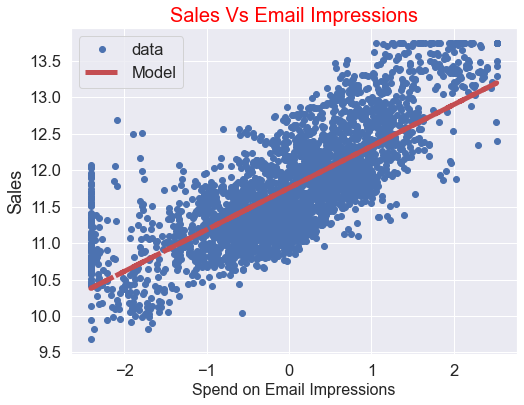

In [72]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_f_1_stand_scaled['Email_Impressions'], y_f_1, 'o', label="data")
ax.plot(X_f_1_stand_scaled['Email_Impressions'], sales_email, 'r-.', label="Model", linewidth= 5)
ax.legend(loc='best');

plt.xlabel('Spend on Email Impressions' , size = 16)   # x axis label
plt.ylabel('Sales')                                # y axis label
plt.title('Sales Vs Email Impressions',size = 20 , color = 'red') 

Text(0.5, 1.0, 'Sales Vs Facebook Impressions')

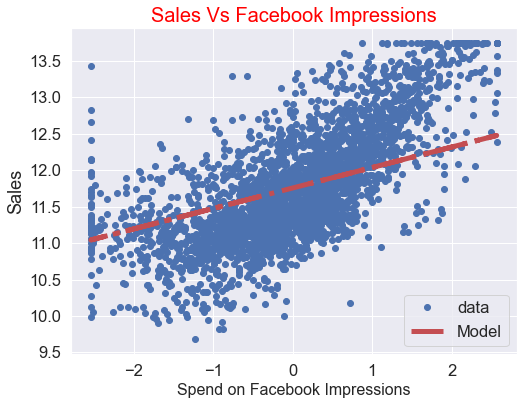

In [73]:
## Facebook impressions
sales_Facebook=0.2811 * data_for_model_3['Facebook_Impressions'] + 11.7566

sales_Facebook.head()

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_f_1_stand_scaled['Facebook_Impressions'], y_f_1, 'o', label="data")
ax.plot(X_f_1_stand_scaled['Facebook_Impressions'], sales_Facebook, 'r-.', label="Model", linewidth= 5)
ax.legend(loc='best');

plt.xlabel('Spend on Facebook Impressions' , size = 16)   # x axis label
plt.ylabel('Sales')                                # y axis label
plt.title('Sales Vs Facebook Impressions',size = 20 , color = 'red') 

Text(0.5, 1.0, 'Sales Vs Affiliate Impressions')

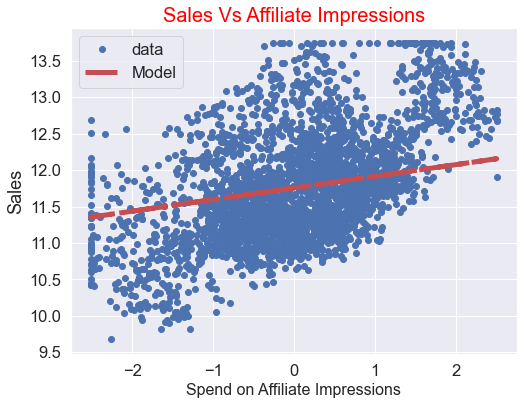

In [74]:
## Affiliate impressions
sales_Affiliate= 0.1597 * data_for_model_3['Affiliate_Impressions'] + 11.7566

sales_Affiliate.head()

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_f_1_stand_scaled['Affiliate_Impressions'], y_f_1, 'o', label="data")
ax.plot(X_f_1_stand_scaled['Affiliate_Impressions'], sales_Affiliate, 'r-.', label="Model", linewidth= 5)
ax.legend(loc='best');

plt.xlabel('Spend on Affiliate Impressions' , size = 16)   # x axis label
plt.ylabel('Sales')                                # y axis label
plt.title('Sales Vs Affiliate Impressions',size = 20 , color = 'red')

Text(0.5, 1.0, 'Sales Vs Google Impressions')

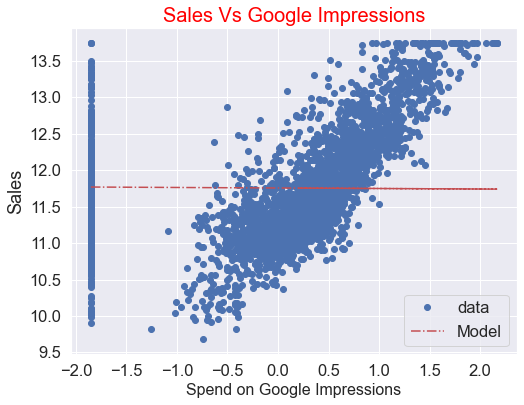

In [69]:
## Google impressions
sales_Google=-0.0071 * data_for_model_3['Google_Impressions'] + 11.7566

sales_Google.head()

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_f_1_stand_scaled['Google_Impressions'], y_f_1, 'o', label="data")
ax.plot(X_f_1_stand_scaled['Google_Impressions'], sales_Google, 'r-.', label="Model")
ax.legend(loc='best');

plt.xlabel('Spend on Google Impressions' , size = 16)   # x axis label
plt.ylabel('Sales')                                # y axis label
plt.title('Sales Vs Google Impressions',size = 20 , color = 'red')